In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
df = pd.read_csv('./data_07.csv')

In [11]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# K-Means Scratch

In [12]:
def kmeans_from_scratch(X, k, max_iters):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [13]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
labels_scratch, centroids_scratch = kmeans_from_scratch(features, k=3, max_iters=100)
df['Cluster_Scratch'] = labels_scratch

# K-Means Sklearn


In [14]:
features_sklearn = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
df['Cluster_SKLearn'] = kmeans_sklearn.fit_predict(features_sklearn)

# Visualisation

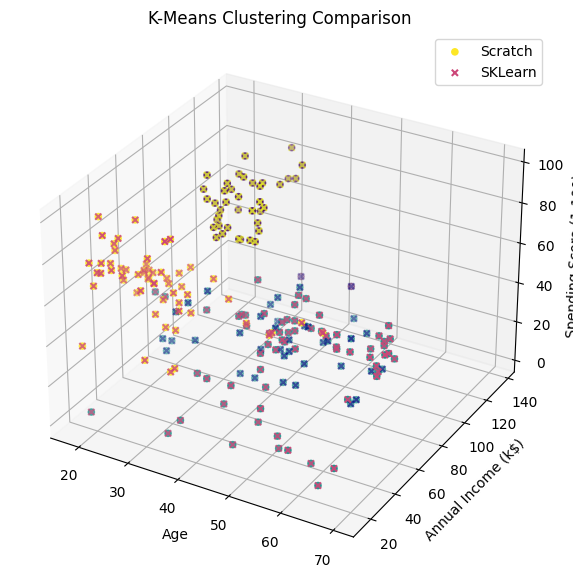

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_scratch = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=labels_scratch, cmap='viridis', marker='o', label='Scratch')
scatter_sklearn = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=df['Cluster_SKLearn'], cmap='plasma', marker='x', label='SKLearn')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering Comparison')
ax.legend()

plt.show()

In [16]:
print("\nComparison of Clustering Results:")
print("Scratch Labels:\n", df['Cluster_Scratch'].value_counts())
print("\nSKLearn Labels:\n", df['Cluster_SKLearn'].value_counts())


Comparison of Clustering Results:
Scratch Labels:
 Cluster_Scratch
1    101
2     58
0     41
Name: count, dtype: int64

SKLearn Labels:
 Cluster_SKLearn
1    123
2     39
0     38
Name: count, dtype: int64


In [18]:
# Calculate centroids
centroids_scratch = np.array([features[df['Cluster_Scratch'] == i].mean(axis=0) for i in range(3)])
centroids_sklearn = kmeans_sklearn.cluster_centers_

# Display centroids
print("\nCentroids (Scratch):\n", centroids_scratch)
print("\nCentroids (SKLearn):\n", centroids_sklearn)


Centroids (Scratch):
 [[32.97560976 88.73170732 79.24390244]
 [47.61386139 61.12871287 31.77227723]
 [27.74137931 39.65517241 61.75862069]]

Centroids (SKLearn):
 [[40.39473684 87.         18.63157895]
 [40.32520325 44.15447154 49.82926829]
 [32.69230769 86.53846154 82.12820513]]


# Inference

1. **Centroids:**
    - The centroids of the clusters differ between the scratch and sklearn implementations.
2. **Cluster Sizes:**
    - The scratch and sklearn implementations result in different cluster sizes, as shown in the provided counts.
    - Further investigation may be needed to understand the cause of these differences.

3. **Visual Comparison:**
    - The 3D plot visually compares the clustering results, with the scratch implementation denoted by circles and sklearn implementation denoted by crosses. Consistent coloring indicates agreement in assigned clusters.

4. **Recommendation:**
    - Consider assessing convergence, exploring parameter adjustments, or inspecting data preprocessing steps to enhance the clustering performance.
    
### Conclusion

In conclusion, differences in centroids, accuracy, and cluster sizes suggest variations between the scratch and sklearn implementations. It's essential to carefully analyze these differences and make adjustments accordingly for more accurate and reliable clustering.
